# Supervised Descent Method - Basics
The aim of this notebook is to showcase how one can build and fit SDMs to images using `Menpo`.

Note that this notebook assumes that the user has previously gone through the AAMs Basics notebook and he/she is already familiar with the basics of `Menpo`'s Deformable Model Fitting framework explained in there.

## 1. Loading data

In this notebook, we will use the training and test sets of the LFPW database for the training and fitting SDMs.

Note that the necessary steps required for acquiring the LFPW database are explained in detail in the AAMs Basics notebook and the user is simply referred to that notebook for this matter.

In [1]:
%matplotlib inline

path_to_lfpw = '/vol/atlas/databases/lfpw/'

In [2]:
import menpo.io as mio

training_images = []
# load landmarked images
for i in mio.import_images(path_to_lfpw + 'trainset/*', verbose=True):
    # crop image
    i = i.crop_to_landmarks_proportion(0.1)
    # convert it to grayscale if needed
    if i.n_channels == 3:
        i = i.as_greyscale(mode='luminosity')
    # append it to the list
    training_images.append(i)

Importing assets: [==========] 100% (811/811) - 00:00:00 remaining


:0: FutureWarning: IPython widgets are experimental and may change in the future.


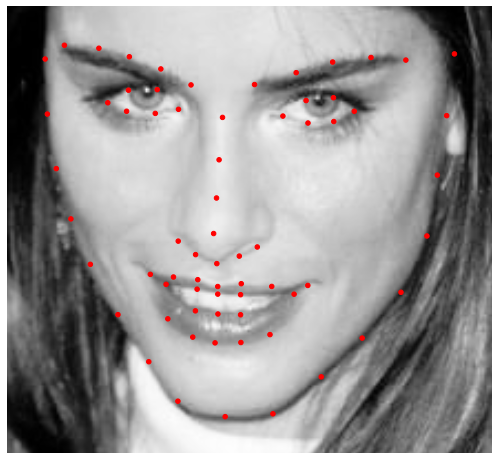

In [3]:
from menpo.visualize import visualize_images

visualize_images(training_images)

## 2. Train a SDM with default parameters

Trainign an SDM using `Menpo` is rather straight forward and can be done using a single line of code.
As expected, the SDM training takes some time.

In [4]:
from menpofit.sdm import SDMTrainer

fitter = SDMTrainer(normalization_diagonal=150,
                    downscale=1.1,
                    n_perturbations=15).train(training_images, verbose=True)

- Normalizing images size: Done
- Apply pyramid: Done
- Building regressors for each of the 3 pyramid levels

Level 1:
- Regression RMSE is 19.70961.
- Fitting shapes: mean error is 0.027711.

Level 2:
- Regression RMSE is 13.04596.
- Fitting shapes: mean error is 0.016353.

Level 3:
- Regression RMSE is 11.91205.
- Fitting shapes: mean error is 0.013340.


It is important to know that, in `Menpo`, SDMs are `Fitter` objects and  like any other `Fitter` object they can be printed: 

In [5]:
print(fitter)

Supervised Descent Method
 - Non-Parametric 'mlr' Regressor
 - 811 training images.
 - Gaussian pyramid with 3 levels and downscale factor of 1.1.
   - Pyramid was applied on feature space.
   - Feature is no_op with 1 channel per image.



## 3. Fit the previous SDM

Let's try fitting the SDM to some images of the LFPW database test set!!!

In [6]:
import menpo.io as mio

# load test images
test_images = []
for i in mio.import_images(path_to_lfpw + 'testset/*.png', max_images=5, verbose=True):
    # crop image
    i = i.crop_to_landmarks_proportion(0.5)
    # convert it to grayscale if needed
    if i.n_channels == 3:
        i = i.as_greyscale(mode='luminosity')
    # append it to the list
    test_images.append(i)

Importing assets: [==========] 100% (5/5) - 00:00:00 remaining


Note that for the purpose of this simple fitting demonstration we will just fit the first 5 images of the LFPW test set.

Fitting a SDM to an image is as simple as calling its `fit` method:

In [7]:
fitting_results = []

# fit images
for j, i in enumerate(test_images):
    # obtain original landmarks
    gt_s = i.landmarks['PTS'].lms
    # generate perturbed landmarks
    s = fitter.perturb_shape(gt_s)
    # fit image
    fr = fitter.fit(i, s, gt_shape=gt_s) 
    # append fitting result to list
    fitting_results.append(fr)
    # print image numebr
    print('Image: ', j)
    # print fitting error
    print(fr)

('Image: ', 0)
Fitting Result
 - Initial error: 0.0742
 - Final error: 0.0213
 - SDM-Non-Parametric method with 3 pyramid levels, 3 iterations and using no_op features.
('Image: ', 1)
Fitting Result
 - Initial error: 0.0672
 - Final error: 0.0154
 - SDM-Non-Parametric method with 3 pyramid levels, 3 iterations and using no_op features.
('Image: ', 2)
Fitting Result
 - Initial error: 0.0445
 - Final error: 0.0249
 - SDM-Non-Parametric method with 3 pyramid levels, 3 iterations and using no_op features.
('Image: ', 3)
Fitting Result
 - Initial error: 0.0919
 - Final error: 0.0339
 - SDM-Non-Parametric method with 3 pyramid levels, 3 iterations and using no_op features.
('Image: ', 4)
Fitting Result
 - Initial error: 0.0663
 - Final error: 0.0246
 - SDM-Non-Parametric method with 3 pyramid levels, 3 iterations and using no_op features.


/home/jab08/pythondev/menpo/menpo/image/base.py:1047: MenpoDeprecationWarning: crop_to_landmarks_proportion_inplace() is deprecated and will be removed in the next major version of menpo. Please use crop_to_landmarks_proportion() instead.
  MenpoDeprecationWarning)


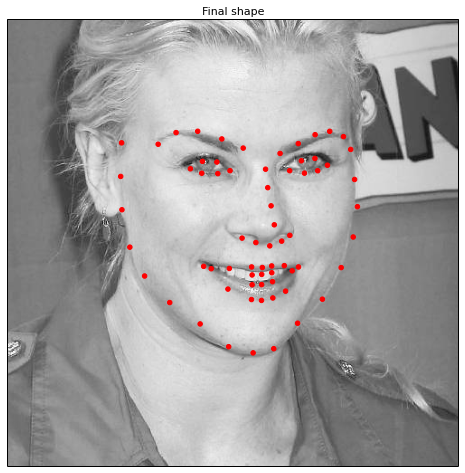

In [9]:
from menpofit.visualize import visualize_fitting_result

visualize_fitting_result(fitting_results)